In [1]:
import os
train_data = os.listdir('train/')[:18000]
print(train_data[0])

dog.8011.jpg


In [2]:
labels = []

for something in train_data:
    if 'cat' in something:
        labels.append(0)
    if 'dog' in something:
        labels.append(1)

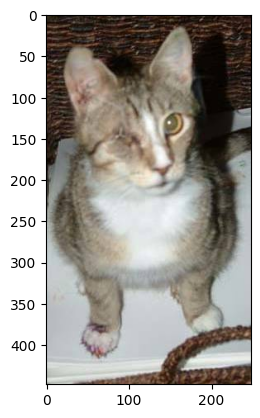

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

cat_image = img.imread("train/cat.1159.jpg")
plt.imshow(cat_image)

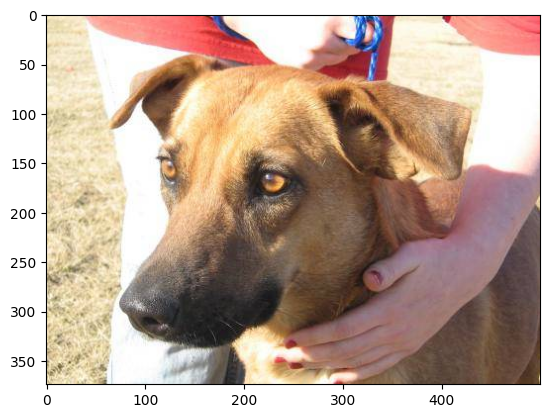

In [4]:
dog_image = img.imread("train/dog.123.jpg")
plt.imshow(dog_image)

In [5]:
# import PIL

# for file_name in train_data:
#     img = PIL.Image.open('train/' + file_name)
#     img = img.resize((224,224))
#     img = img.convert("RGB")

#     img.save('resized/' + file_name)

In [6]:
import cv2
import numpy as np 


cat_n_dog_img = []


for file_name in train_data:
    img = cv2.imread("resized/" + file_name)
    cat_n_dog_img.append(img)

cat_n_dog_img = np.asarray(cat_n_dog_img)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG 

In [7]:
from sklearn.model_selection import train_test_split 

labels = np.asarray(labels)

x_train, x_test, y_train, y_test, = train_test_split(cat_n_dog_img, labels, test_size=0.2, random_state=2)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [8]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [10]:
model.fit(x_train_scaled, y_train , epochs = 5)

Epoch 1/5
450/450 [==============================] - 59s 129ms/step - loss: 0.0894 - acc: 0.9661
Epoch 2/5
450/450 [==============================] - 58s 129ms/step - loss: 0.0490 - acc: 0.9833
Epoch 3/5
450/450 [==============================] - 58s 129ms/step - loss: 0.0429 - acc: 0.9850
Epoch 4/5
450/450 [==============================] - 59s 132ms/step - loss: 0.0387 - acc: 0.9862
Epoch 5/5
450/450 [==============================] - 61s 136ms/step - loss: 0.0362 - acc: 0.9872


In [11]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Score: ', score)
print('Accuracy: ', acc)

113/113 [==============================] - 18s 152ms/step - loss: 0.0724 - acc: 0.9742
Score:  0.07241877913475037
Accuracy:  0.9741666913032532


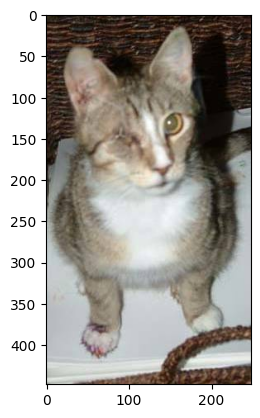

In [14]:
import matplotlib.image as img

image_number = 60
test_image = img.imread(f"test1/{image_number}.jpg")
plt.imshow(cat_image)

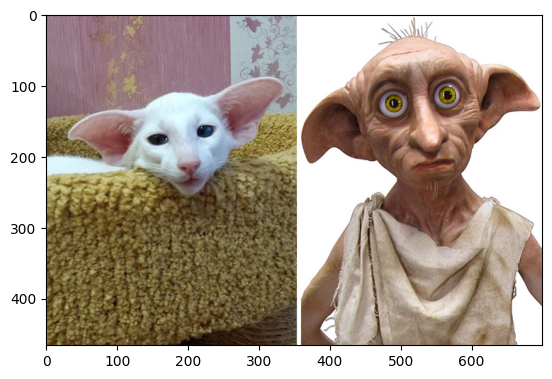

In [17]:
test_image = img.imread(f"cat-looks.jpeg")
plt.imshow(test_image)

In [18]:
input_image = cv2.imread(f"cat-looks.jpeg")

input_image = cv2.resize(input_image, (224, 224))

input_image = input_image/255

input_image = np.reshape(input_image, [1, 224, 224, 3])

prediction = model.predict(input_image)

print(prediction)

cat_or_dog = np.argmax(prediction)

print(cat_or_dog)

1/1 [==============================] - 0s 26ms/step
[[-2.1017985  2.3919349]]
1
